In [143]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import matplotlib.ticker as ticker
import matplotlib.cm as cm
import matplotlib as mpl
from matplotlib.gridspec import GridSpec

In [144]:
#db = pd.read_excel('data/CodaLab_3108.xlsx', sheet_name='INIT') 
#without dassault competiton, which is an outlier as for the reward:
db = pd.read_excel('data/CodaLab_3108.xlsx', sheet_name='INIT_2') 

db['submission_per_participant'] = db['submissions']/db['participants']
db['log_reward'] = np.log(db['reward_USD']+1)
db['log_submissions'] = np.log(db['submissions'])
db['log_participants'] = np.log(db['participants'])
print(db.shape)

(830, 33)


In [145]:
db.head(3)

,title,description,participants,submissions,year,phases,reward,reward_USD,duration_day,challenge,website,papers,winner's code,dataset,field of application,ML domain,real task,ML task,u_mean,u_median,dataset size,dataset details,score,metrics,multi-score,multi-task,results submission,code submission,remark,submission_per_participant,log_reward,log_submissions,log_participants
0,The Third Evaluation Workshop on Chinese Machi...,It is the sentence cloze-style machine reading...,46,248.0,2019,3,6500 USD,6500,87.0,https://competitions.codalab.org/competitions/...,https://hfl-rc.com/cmrc2019/; https://ymcui.co...,https://arxiv.org/pdf/2004.03116.pdf,None,https://github.com/ymcui/cmrc2019,"linguistic, philology, litterature",NLP,sentence cloze-style machine reading comprehen...,machine reading comprehension,1.176030,1.192569,10000,NaN,QAC,"Question Accuracy (QAC),Passage Accuracy (PAC)...",1.0,0.0,1.0,0.0,https://github.com/ymcui/cmrc2019/tree/master/...,5.391304,8.779711,5.513429,3.828641
1,Pose-guided Human Rendering Benchmark Challenge,HUMBI is an ideal dataset to evaluate the abil...,12,65.0,2013,1,0,0,NaN,https://competitions.codalab.org/competitions/...,https://www.humbi-data.net/,https://arxiv.org/pdf/2110.00119.pdf; https://...,None,https://competitions.codalab.org/competitions/...,NaN,Computer vision,posture generation,image generation,1.192141,1.099530,374352,"366300 train images, 7674 validation images, 3...",Mrmse,"RMSE, MRMSE, SSIM, MSSIM, ranking is based on ...",0.0,0.0,1.0,0.0,https://github.com/Gorokke/humanrender_class,5.416667,0.000000,4.174387,2.484907
2,MICCAI Multimodal Brain Tumor Segmentation (BR...,The BRaTS challenge is designed to gauge the c...,141,50.0,2013,2,0,0,22.0,https://competitions.codalab.org/competitions/1,http://braintumorsegmentation.org/,https://hal.inria.fr/hal-00912934/document; ht...,None,NaN,medicine,Computer vision,image recognition,image recognition,NaN,NaN,NaN,772 distinctive subjects,Overall Rank,"Dice score, Hausdorff distance, Sensitivity, S...",1.0,0.0,1.0,0.0,NaN,0.354610,0.000000,3.912023,4.948760


### choose if to include year 2022

In [146]:
# without 2022!
#db = db[db.year!=2022].copy()

## EDA

In [147]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 830 entries, 0 to 829
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   title                       830 non-null    object 
 1   description                 802 non-null    object 
 2   participants                830 non-null    int64  
 3   submissions                 823 non-null    float64
 4   year                        830 non-null    int64  
 5   phases                      830 non-null    int64  
 6   reward                      824 non-null    object 
 7   reward_USD                  830 non-null    int64  
 8   duration_day                717 non-null    float64
 9   challenge                   830 non-null    object 
 10  website                     115 non-null    object 
 11  papers                      60 non-null     object 
 12  winner's code               43 non-null     object 
 13  dataset                     29 non-

In [148]:
db.describe(include ='all') 

,title,description,participants,submissions,year,phases,reward,reward_USD,duration_day,challenge,website,papers,winner's code,dataset,field of application,ML domain,real task,ML task,u_mean,u_median,dataset size,dataset details,score,metrics,multi-score,multi-task,results submission,code submission,remark,submission_per_participant,log_reward,log_submissions,log_participants
count,830,802,830.000000,823.000000,830.000000,830.000000,824,830.000000,717.000000,830,115,60,43,29,728,830,785,789,396.000000,396.000000,17,81,790,799,804.000000,804.000000,823.000000,823.000000,18,823.000000,830.000000,823.000000,830.000000
unique,816,672,NaN,NaN,NaN,NaN,42,NaN,NaN,829,101,54,9,24,97,6,683,168,NaN,NaN,16,71,371,398,NaN,NaN,NaN,NaN,18,NaN,NaN,NaN,NaN
top,"To be, or not to be?",Saving data by adding visual knowledge priors ...,NaN,NaN,NaN,NaN,None,NaN,NaN,https://competitions.codalab.org/competitions/...,https://chalearnlap.cvc.uab.cat/challenge/51/d...,https://arxiv.org/pdf/1805.06561.pdf,None,https://cocodataset.org/#download,multimedia,Computer vision,test domain adaptation methods’ ability to tra...,multi-class classification,NaN,NaN,regression,3D annotations for more than 65 sequences capt...,PSNR,accuracy,NaN,NaN,NaN,NaN,https://github.com/VisionLearningGroup/taskcv-...,NaN,NaN,NaN,NaN
freq,3,9,NaN,NaN,NaN,NaN,697,NaN,NaN,2,3,3,34,3,250,373,6,122,NaN,NaN,2,3,55,80,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN
mean,NaN,NaN,139.869880,789.059538,2019.698795,2.412048,NaN,866.578313,693.617852,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.806483,1.748305,NaN,NaN,NaN,NaN,0.507463,0.180348,0.993925,0.162819,NaN,5.387564,1.023054,5.367465,4.277981
std,NaN,NaN,284.278805,2365.175328,1.902541,2.296764,NaN,3477.968481,3464.760276,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.177237,3.492317,NaN,NaN,NaN,NaN,0.500256,0.384717,0.077755,0.369425,NaN,7.917858,2.764113,1.533252,1.072316
min,NaN,NaN,5.000000,10.000000,2013.000000,1.000000,NaN,0.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.098874,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,0.069583,0.000000,2.302585,1.609438
25%,NaN,NaN,35.000000,69.000000,2019.000000,2.000000,NaN,0.000000,53.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.124924,1.069264,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,0.000000,NaN,1.446927,0.000000,4.234107,3.555348
50%,NaN,NaN,71.000000,205.000000,2020.000000,2.000000,NaN,0.000000,79.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.247549,1.159219,NaN,NaN,NaN,NaN,1.000000,0.000000,1.000000,0.000000,NaN,3.148649,0.000000,5.323010,4.262680
75%,NaN,NaN,147.000000,579.000000,2021.000000,2.000000,NaN,0.000000,153.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.569930,1.448468,NaN,NaN,NaN,NaN,1.000000,0.000000,1.000000,0.000000,NaN,6.524768,0.000000,6.361302,4.990433


In [149]:
print(db['ML domain'].nunique())
print(db['ML domain'].unique())

6
['NLP' 'Computer vision' 'AutoML' 'Multi-domain' 'Signal processing' 'RL']


In [150]:
param = 'all' #'all', [object], [np.number]
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(db.describe(include=param).round(decimals = 2))

,title,description,participants,submissions,year,phases,reward,reward_USD,duration_day,challenge,website,papers,winner's code,dataset,field of application,ML domain,real task,ML task,u_mean,u_median,dataset size,dataset details,score,metrics,multi-score,multi-task,results submission,code submission,remark,submission_per_participant,log_reward,log_submissions,log_participants
count,830,802,830.00,823.00,830.0,830.00,824,830.00,717.00,830,115,60,43,29,728,830,785,789,396.00,396.00,17,81,790,799,804.00,804.00,823.00,823.00,18,823.00,830.00,823.00,830.00
unique,816,672,NaN,NaN,NaN,NaN,42,NaN,NaN,829,101,54,9,24,97,6,683,168,NaN,NaN,16,71,371,398,NaN,NaN,NaN,NaN,18,NaN,NaN,NaN,NaN
top,"To be, or not to be?",Saving data by adding visual knowledge priors ...,NaN,NaN,NaN,NaN,None,NaN,NaN,https://competitions.codalab.org/competitions/...,https://chalearnlap.cvc.uab.cat/challenge/51/d...,https://arxiv.org/pdf/1805.06561.pdf,None,https://cocodataset.org/#download,multimedia,Computer vision,test domain adaptation methods’ ability to tra...,multi-class classification,NaN,NaN,regression,3D annotations for more than 65 sequences capt...,PSNR,accuracy,NaN,NaN,NaN,NaN,https://github.com/VisionLearningGroup/taskcv-...,NaN,NaN,NaN,NaN
freq,3,9,NaN,NaN,NaN,NaN,697,NaN,NaN,2,3,3,34,3,250,373,6,122,NaN,NaN,2,3,55,80,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN
mean,NaN,NaN,139.87,789.06,2019.7,2.41,NaN,866.58,693.62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.81,1.75,NaN,NaN,NaN,NaN,0.51,0.18,0.99,0.16,NaN,5.39,1.02,5.37,4.28
std,NaN,NaN,284.28,2365.18,1.9,2.30,NaN,3477.97,3464.76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.18,3.49,NaN,NaN,NaN,NaN,0.50,0.38,0.08,0.37,NaN,7.92,2.76,1.53,1.07
min,NaN,NaN,5.00,10.00,2013.0,1.00,NaN,0.00,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.10,0.00,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,NaN,0.07,0.00,2.30,1.61
25%,NaN,NaN,35.00,69.00,2019.0,2.00,NaN,0.00,53.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.12,1.07,NaN,NaN,NaN,NaN,0.00,0.00,1.00,0.00,NaN,1.45,0.00,4.23,3.56
50%,NaN,NaN,71.00,205.00,2020.0,2.00,NaN,0.00,79.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.25,1.16,NaN,NaN,NaN,NaN,1.00,0.00,1.00,0.00,NaN,3.15,0.00,5.32,4.26
75%,NaN,NaN,147.00,579.00,2021.0,2.00,NaN,0.00,153.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.57,1.45,NaN,NaN,NaN,NaN,1.00,0.00,1.00,0.00,NaN,6.52,0.00,6.36,4.99


In [151]:
db.describe().round(decimals = 2)
#used for report
#db[['participants', 'submissions', 'reward_USD', 'duration_day', 'code submission']].describe().round(decimals = 2)

,participants,submissions,year,phases,reward_USD,duration_day,u_mean,u_median,multi-score,multi-task,results submission,code submission,submission_per_participant,log_reward,log_submissions,log_participants
count,830.00,823.00,830.0,830.00,830.00,717.00,396.00,396.00,804.00,804.00,823.00,823.00,823.00,830.00,823.00,830.00
mean,139.87,789.06,2019.7,2.41,866.58,693.62,1.81,1.75,0.51,0.18,0.99,0.16,5.39,1.02,5.37,4.28
std,284.28,2365.18,1.9,2.30,3477.97,3464.76,3.18,3.49,0.50,0.38,0.08,0.37,7.92,2.76,1.53,1.07
min,5.00,10.00,2013.0,1.00,0.00,1.00,-0.10,0.00,0.00,0.00,0.00,0.00,0.07,0.00,2.30,1.61
25%,35.00,69.00,2019.0,2.00,0.00,53.00,1.12,1.07,0.00,0.00,1.00,0.00,1.45,0.00,4.23,3.56
50%,71.00,205.00,2020.0,2.00,0.00,79.00,1.25,1.16,1.00,0.00,1.00,0.00,3.15,0.00,5.32,4.26
75%,147.00,579.00,2021.0,2.00,0.00,153.00,1.57,1.45,1.00,0.00,1.00,0.00,6.52,0.00,6.36,4.99
max,4894.00,35260.00,2022.0,36.00,40000.00,29384.00,58.74,61.91,1.00,1.00,1.00,1.00,129.76,10.60,10.47,8.50


In [152]:
db['ML domain'].value_counts(normalize=True)

Computer vision      0.449398
NLP                  0.379518
Multi-domain         0.089157
Signal processing    0.032530
AutoML               0.027711
RL                   0.021687
Name: ML domain, dtype: float64

In [153]:
db['reward_USD'].value_counts(bins=4)

(-40.001, 10000.0]    811
(10000.0, 20000.0]     14
(20000.0, 30000.0]      3
(30000.0, 40000.0]      2
Name: reward_USD, dtype: int64

In [154]:
pd.set_option('display.max_columns', 100)
db.groupby('ML domain')[['participants','submissions','reward_USD']].\
                        agg(['count', 'sum',  'mean', 'median',np.std, np.min, np.max])

participants                                             \
                         count    sum        mean median         std amin   
ML domain                                                                   
AutoML                      23   2463  107.086957   56.0  154.820105   15   
Computer vision            373  69189  185.493298   89.0  392.258827    8   
Multi-domain                74   6856   92.648649   53.5  110.121282    5   
NLP                        315  33775  107.222222   57.0  146.163141    6   
RL                          18   1889  104.944444   69.0   86.430164    6   
Signal processing           27   1920   71.111111   69.0   46.992089   14   

                        submissions                                            \
                   amax       count       sum        mean median          std   
ML domain                                                                       
AutoML              717          22   13839.0  629.045455  272.5  1114.168042   
Computer vision    4894         370  350123.0  946.278378  210.0  2885.852350   
Multi-domain        531          72   49389.0  685.958333  151.0  2910.822029   
NLP                1297         314  212405.0  676.449045  195.5  1655.916699   
RL                  273          18   10977.0  609.833333  231.5   805.504172   
Signal processing   223          27   12663.0  469.000000  352.0   635.150921   

                                 reward_USD                              \
                   amin     amax      count     sum         mean median   
ML domain                                                                 
AutoML             25.0   5097.0         23  112000  4869.565217   1000   
Computer vision    10.0  35260.0        373  341100   914.477212      0   
Multi-domain       12.0  24724.0         74   93900  1268.918919      0   
NLP                10.0  18149.0        315   80660   256.063492      0   
RL                 11.0   3150.0         18   91500  5083.333333   6000   
Signal processing  11.0   2696.0         27     100     3.703704      0   

                                            
                           std amin   amax  
ML domain                                   
AutoML             9190.184229    0  33500  
Computer vision    3600.799576    0  40000  
Multi-domain       4295.774467    0  25000  
NLP                1562.115704    0  20000  
RL                 4814.958310    0  15000  
Signal processing    19.245009    0    100

In [155]:
#median feartures per ML domain
db.groupby('ML domain').median()

,participants,submissions,year,phases,reward_USD,duration_day,u_mean,u_median,multi-score,multi-task,results submission,code submission,submission_per_participant,log_reward,log_submissions,log_participants
ML domain,,,,,,,,,,,,,,,,
AutoML,56.0,272.5,2019.0,2.0,1000.0,91.0,1.561345,1.144127,0.0,0.0,1.0,1.0,4.600000,6.908755,5.607031,4.025352
Computer vision,89.0,210.0,2020.0,2.0,0.0,78.0,1.230478,1.141920,1.0,0.0,1.0,0.0,2.542281,0.000000,5.347108,4.488636
Multi-domain,53.5,151.0,2020.0,2.0,0.0,76.0,1.492475,1.446947,1.0,0.0,1.0,0.0,2.829223,0.000000,5.016731,3.979638
NLP,57.0,195.5,2020.0,2.0,0.0,91.0,1.222893,1.154514,1.0,0.0,1.0,0.0,3.682332,0.000000,5.275557,4.043051
RL,69.0,231.5,2021.0,2.0,6000.0,127.0,4.247886,5.893744,0.5,0.0,1.0,1.0,3.297743,8.699681,5.392966,4.231474
Signal processing,69.0,352.0,2021.0,2.0,0.0,46.0,2.167614,1.513634,1.0,0.0,1.0,0.0,3.315789,0.000000,5.863631,4.234107


In [156]:
# dif stats on feature "participants" per ML domain
# filtered in ascending order per median value
db.groupby('ML domain')['participants'].agg(['count', 'sum',  'mean', 'median']).sort_values(by='median', ascending=False)

,count,sum,mean,median
ML domain,,,,
Computer vision,373,69189,185.493298,89.0
RL,18,1889,104.944444,69.0
Signal processing,27,1920,71.111111,69.0
NLP,315,33775,107.222222,57.0
AutoML,23,2463,107.086957,56.0
Multi-domain,74,6856,92.648649,53.5


In [157]:
pd.crosstab(db['ML domain'], db['year'])

year,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
ML domain,,,,,,,,,,
AutoML,0,1,5,0,1,1,6,3,1,5
Computer vision,2,6,7,10,19,32,63,67,100,67
Multi-domain,0,0,3,1,5,5,6,22,16,16
NLP,0,2,3,32,20,25,42,84,74,33
RL,0,0,0,0,1,0,1,6,8,2
Signal processing,0,0,0,0,0,2,2,4,15,4


## Histograms

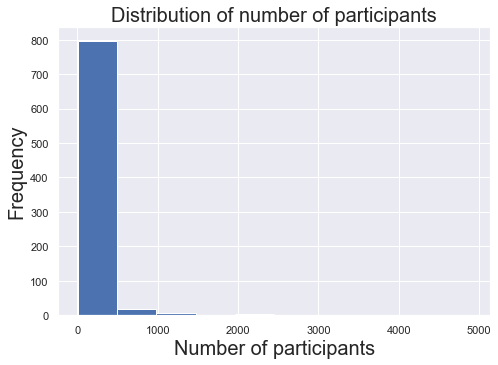

In [158]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.hist(db['participants'])
axes.set_xlabel('Number of participants', fontsize=20)
axes.set_ylabel('Frequency', fontsize=20)
plt.rcParams['axes.titlesize'] = 20
plt.rcParams["figure.figsize"] = (5,5)
axes.set_title('Distribution of number of participants')
plt.show();

#shorter version:
#db['participants'].plot(kind = 'hist', grid = True, title = 'Distribution of participants')

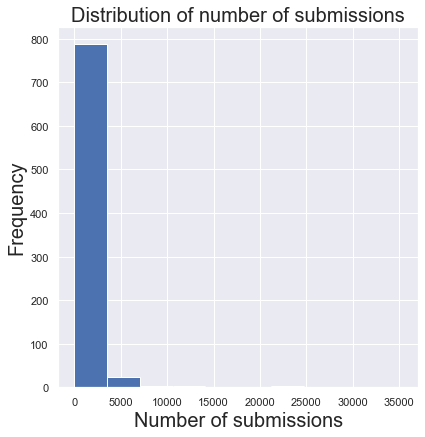

In [159]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.hist(db['submissions'])
axes.set_xlabel('Number of submissions', fontsize=20)
axes.set_ylabel('Frequency', fontsize=20)
axes.set_title('Distribution of number of submissions')
plt.show()

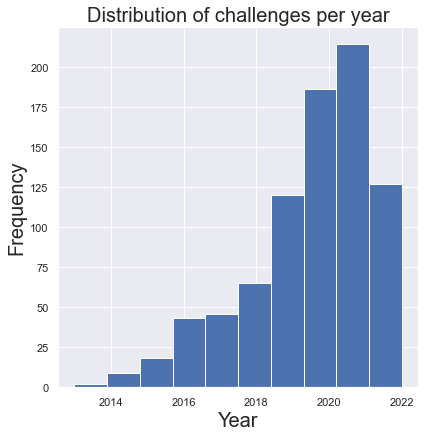

In [160]:
#2022 is not complet
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.hist(db['year'])
axes.set_xlabel('Year', fontsize=20)
axes.set_ylabel('Frequency', fontsize=20)
axes.set_title('Distribution of challenges per year')
plt.show();

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


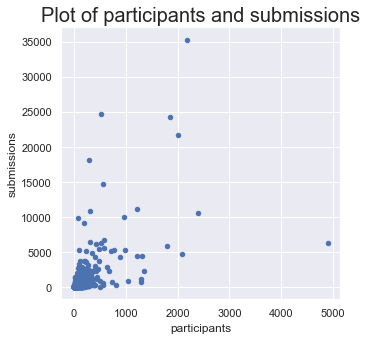

In [161]:
db.plot(x = 'participants', y = 'submissions', kind = 'scatter', grid = True, title = 'Plot of participants and submissions')
plt.savefig("images/participants_submissions.png")

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


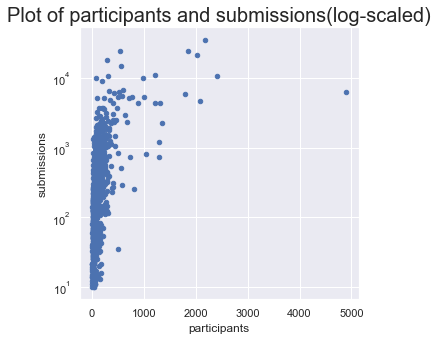

In [162]:
#db.plot(x = 'participants', y = 'log_submissions', kind = 'scatter', grid = True, title = 'Plot of participants and submissions')
db.plot(x = 'participants', y = 'submissions', logy=True, kind = 'scatter', grid = True, \
        title = 'Plot of participants and submissions(log-scaled)')
plt.savefig("images/participants_log_submissions.png")

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:title={'center':'Plot of participants and submissions(log-scaled both)'}, xlabel='participants', ylabel='submissions'>

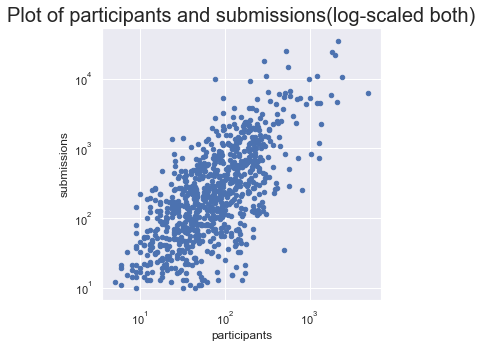

In [163]:
db.plot(x = 'participants', y = 'submissions', logx=True, logy=True, \
        kind = 'scatter', grid = True, title = 'Plot of participants and submissions(log-scaled both)')
#plt.savefig("images/log_participants_log_submissions.png")

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


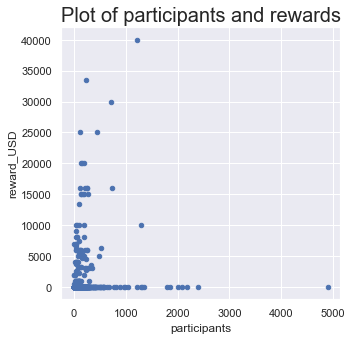

In [164]:
db.plot(x = 'participants', y = 'reward_USD', kind = 'scatter', \
        grid = True, title = 'Plot of participants and rewards')
plt.savefig("images/participants_reward.png")

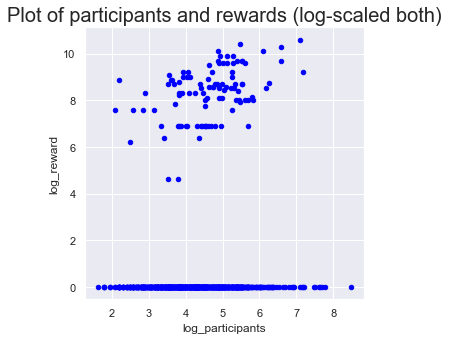

In [165]:
db.plot(x = 'log_participants', y = 'log_reward', color="blue",\
        kind = 'scatter', grid = True, \
        title = 'Plot of participants and rewards (log-scaled both)')
plt.savefig("images/log_participants_log_reward.png")

In [166]:
db['results submission'].value_counts(normalize=True)

1.0    0.993925
0.0    0.006075
Name: results submission, dtype: float64

In [167]:
db['code submission'].value_counts(normalize=True)

0.0    0.837181
1.0    0.162819
Name: code submission, dtype: float64

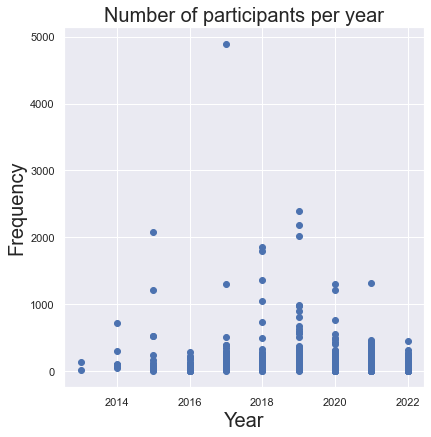

In [168]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.set_xlabel('Year', fontsize=20)
axes.set_ylabel('Frequency', fontsize=20)
plt.rcParams['axes.titlesize'] = 20
axes.set_title('Number of participants per year')
axes.scatter(x = db['year'], y = db['participants'])
plt.show()

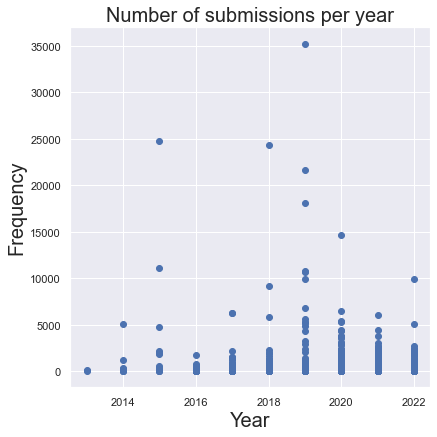

In [169]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.set_xlabel('Year', fontsize=20)
axes.set_ylabel('Frequency', fontsize=20)
plt.rcParams['axes.titlesize'] = 20
axes.set_title('Number of submissions per year')
axes.scatter(x = db['year'], y = db['submissions'])

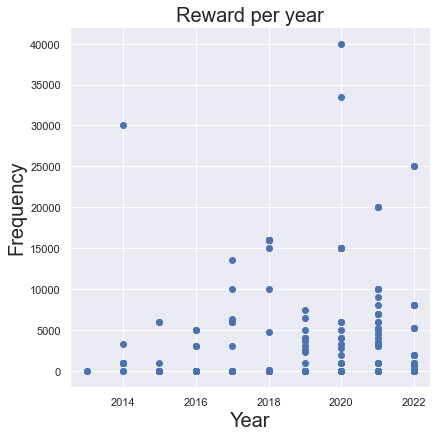

In [170]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.set_xlabel('Year', fontsize=20)
axes.set_ylabel('Frequency', fontsize=20)
plt.rcParams['axes.titlesize'] = 20
axes.set_title('Reward per year')
axes.scatter(x = db['year'], y = db['reward_USD'])
plt.show()

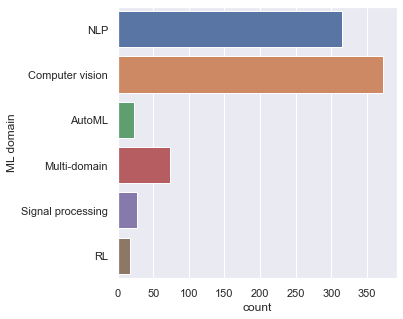

In [171]:
sns.countplot(y = 'ML domain',  data = db); 

In [172]:
#2d version
'''
db['ML domain'].value_counts().plot(kind = 'barh', 
                              grid = True, 
                              colormap = 'coolwarm', 
                              title = 'Machine learning domains distribution')
'''

"\ndb['ML domain'].value_counts().plot(kind = 'barh', \n                              grid = True, \n                              colormap = 'coolwarm', \n                              title = 'Machine learning domains distribution')\n"

<AxesSubplot:xlabel='count', ylabel='ML domain'>

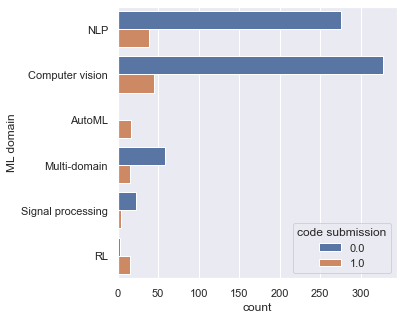

In [173]:
sns.countplot(y = 'ML domain',  data = db, hue = "code submission") 

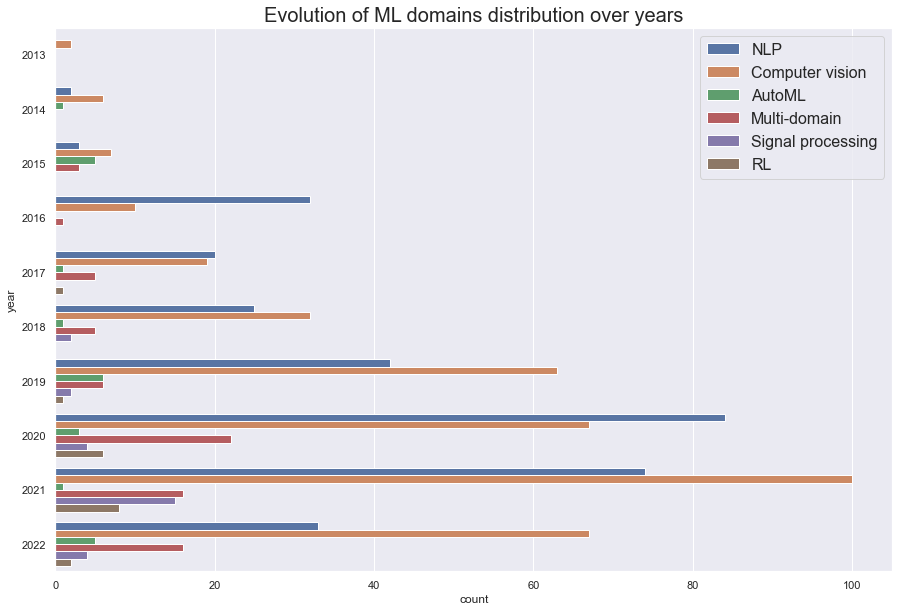

In [174]:
sns.set(rc = {'figure.figsize':(15,10)})
ax = sns.countplot(y="year", hue="ML domain", data=db)
plt.legend(loc='upper right',fontsize = 16)
plt.title("Evolution of ML domains distribution over years", fontsize=20)
fig = ax.get_figure()
fig.savefig('images/MLdomains_years.png')

No handles with labels found to put in legend.


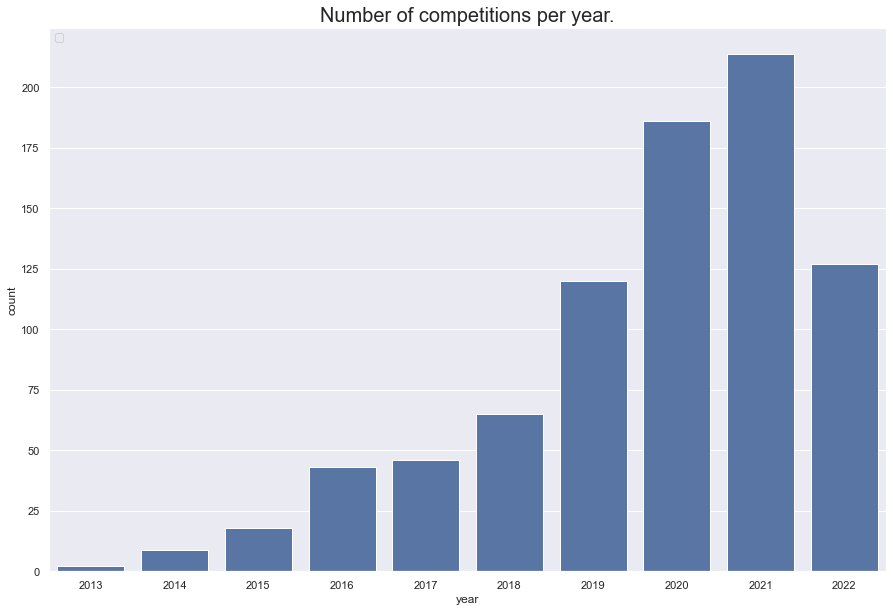

In [175]:
sns.set(rc = {'figure.figsize':(15,10)})
ax = sns.countplot(x="year", data=db, color='#5975a4', saturation=1)
plt.legend(loc='upper left')
plt.title("Number of competitions per year.", fontsize=20)
fig = ax.get_figure()
#fig.savefig('images/Nbr_compet_year.png')

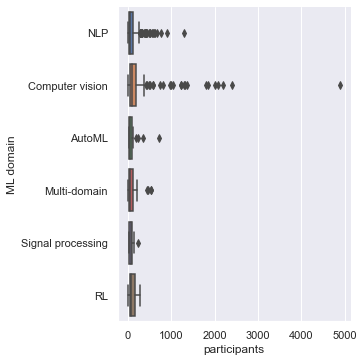

In [176]:
sns.catplot(x="participants", y="ML domain", kind="box", data=db, orient="h")

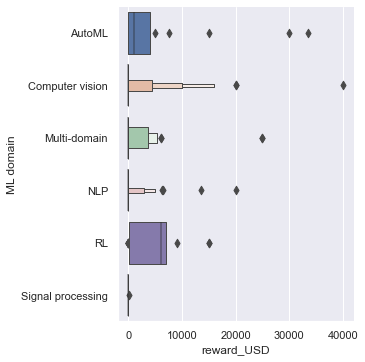

In [177]:
sns.catplot(x="reward_USD", y="ML domain", kind="boxen", # x="log_reward"
            data=db.sort_values("ML domain"), orient="h")

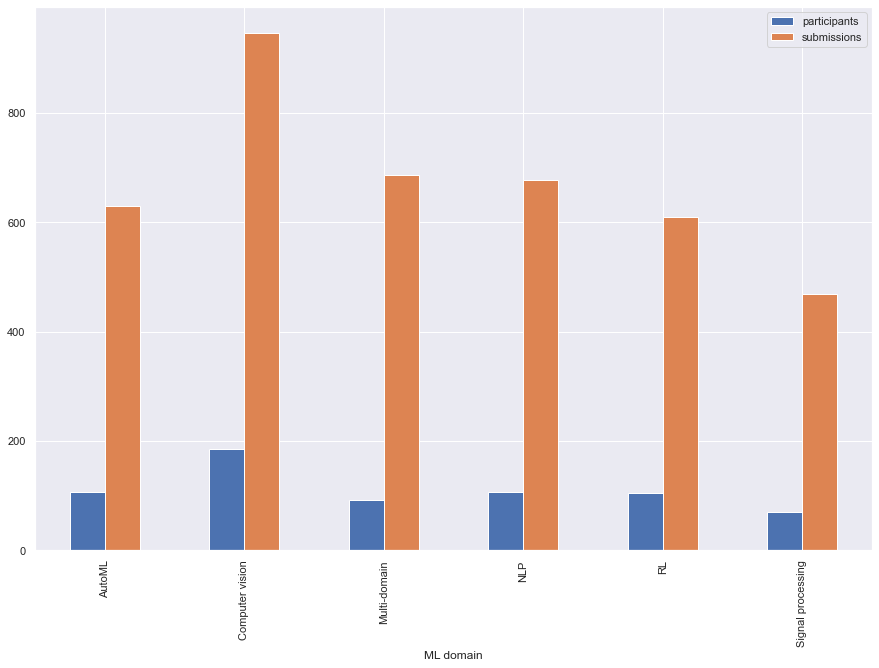

In [178]:
db.pivot_table(values = ['participants', 'submissions'], index = 'ML domain', aggfunc = 'mean').plot(kind = 'bar')
plt.rcParams["figure.figsize"] = (20,3)

## it's pie charts time!
### experiments with different pie charts

In [179]:
domains1 = db['ML domain'].value_counts()

In [180]:
domains1.values

array([373, 315,  74,  27,  23,  18], dtype=int64)

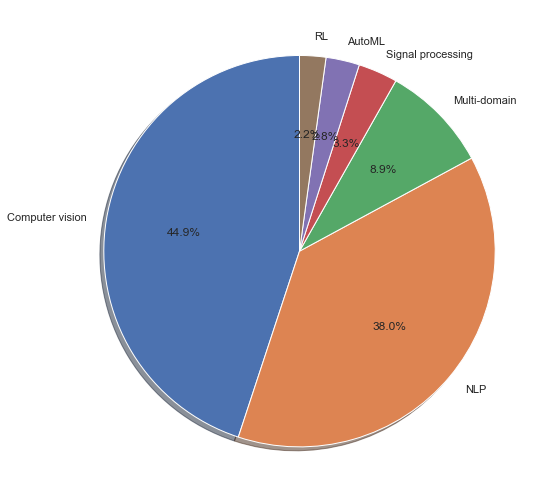

In [181]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = domains1.index
sizes = domains1.values
#explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')
#plt.rcParams["figure.figsize"] = (80,12)

fig1, ax1 = plt.subplots(figsize=(18, 9), subplot_kw=dict(aspect="equal"))

ax1.pie(sizes,  labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
#ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.



#sns.set(rc = {'figure.figsize':(40,35)})
plt.show()

fig1.savefig('images/piechart_domains.png')

In [182]:
df_domains = db.groupby('ML domain', axis=0).count()

# note: the output of the groupby method is a `groupby' object. 
# we can not use it further until we apply a function (eg .sum())
print(type(db.groupby('ML domain', axis=0)))

df_domains.head()

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


,title,description,participants,submissions,year,phases,reward,reward_USD,duration_day,challenge,website,papers,winner's code,dataset,field of application,real task,ML task,u_mean,u_median,dataset size,dataset details,score,metrics,multi-score,multi-task,results submission,code submission,remark,submission_per_participant,log_reward,log_submissions,log_participants
ML domain,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AutoML,23,21,23,22,23,23,22,23,21,23,1,2,1,1,4,6,13,8,8,0,0,22,6,6,6,16,16,0,22,23,22,23
Computer vision,373,364,373,370,373,373,370,373,332,373,51,23,24,12,328,361,361,196,196,12,49,364,367,371,371,373,373,7,370,373,370,373
Multi-domain,74,71,74,72,74,74,73,74,58,74,16,6,2,1,59,69,67,28,28,1,9,72,73,73,73,74,74,0,72,74,72,74
NLP,315,302,315,314,315,315,314,315,263,315,38,25,16,15,299,305,303,140,140,4,22,289,314,315,315,315,315,11,314,315,314,315
RL,18,17,18,18,18,18,18,18,18,18,4,0,0,0,11,18,18,6,6,0,0,18,12,12,12,18,18,0,18,18,18,18


In [183]:
type_labels = df_domains['title'].sort_values().index
type_counts = df_domains['title'].sort_values()

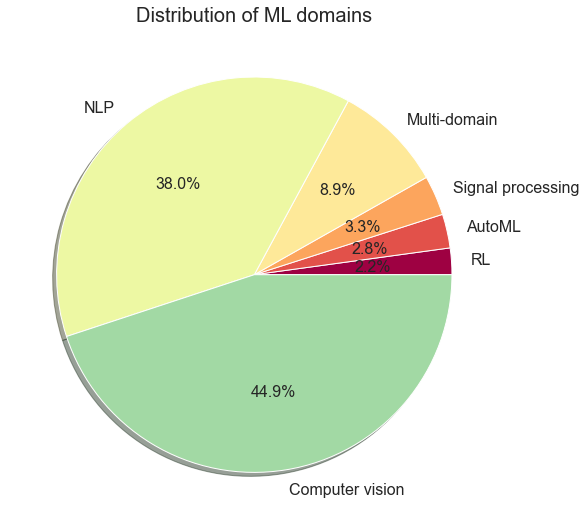

In [184]:
plt.figure(1, figsize=(40,20)) 
the_grid = GridSpec(2, 2)

cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]
plt.rcParams['axes.titlesize'] = 20
plt.subplot(the_grid[0, 1], aspect=1, title='Distribution of ML domains')
type_show_ids = plt.pie(type_counts, labels=type_labels, autopct='%1.1f%%', textprops={'fontsize': 16}, \
                        shadow=True, colors=colors)
plt.savefig("images/MLdomains_piechart.png")
plt.show()



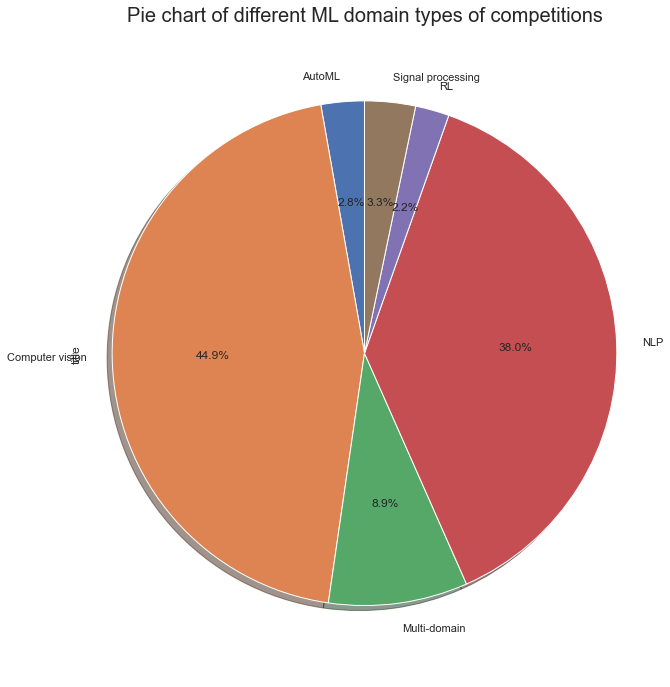

In [185]:
df_domains['title'].plot(kind='pie',
                            figsize=(10, 12),
                            autopct='%1.1f%%', # add in percentages
                            startangle=90,     # start angle 90° (Africa)
                            shadow=True,       # add shadow      
                            )

plt.title('Pie chart of different ML domain types of competitions', fontsize=20)
plt.axis('equal') # Sets the pie chart to look like a circle.

plt.show()

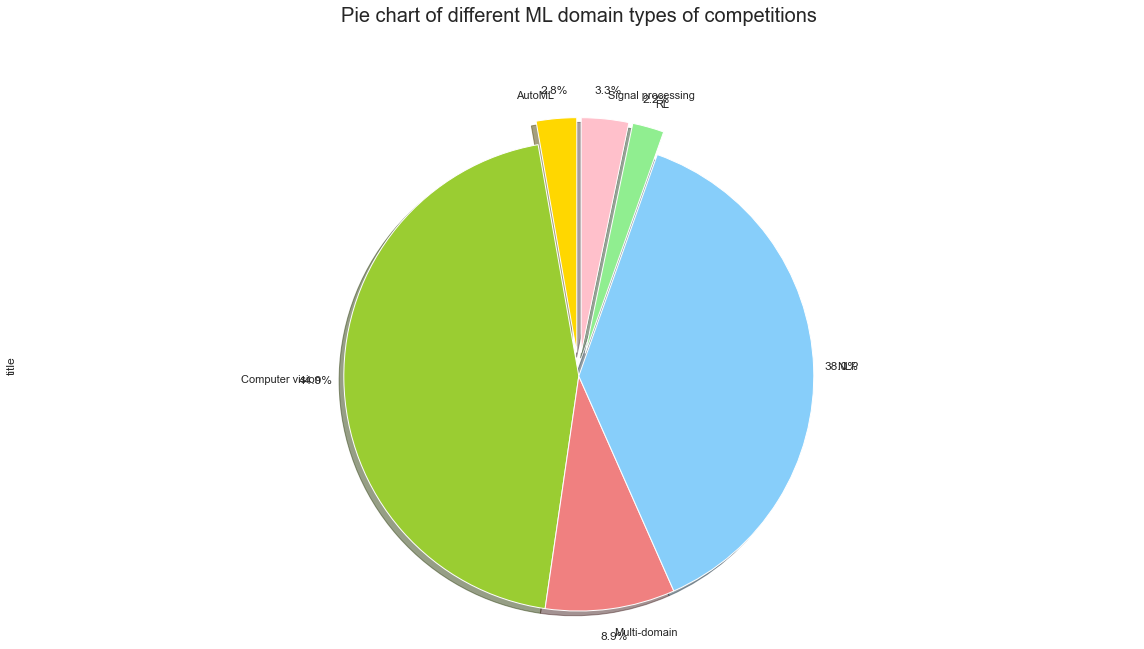

In [186]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0, 0, 0, 0.1, 0.1] # ratio for each continent with which to offset each wedge.

df_domains['title'].plot(kind='pie',
                            figsize=(20, 10),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=df_domains.index,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('Pie chart of different ML domain types of competitions', y=1.12) 

plt.axis('equal') 

# add legend
#plt.legend(labels=df_domains.index, loc='upper left') 

plt.show()

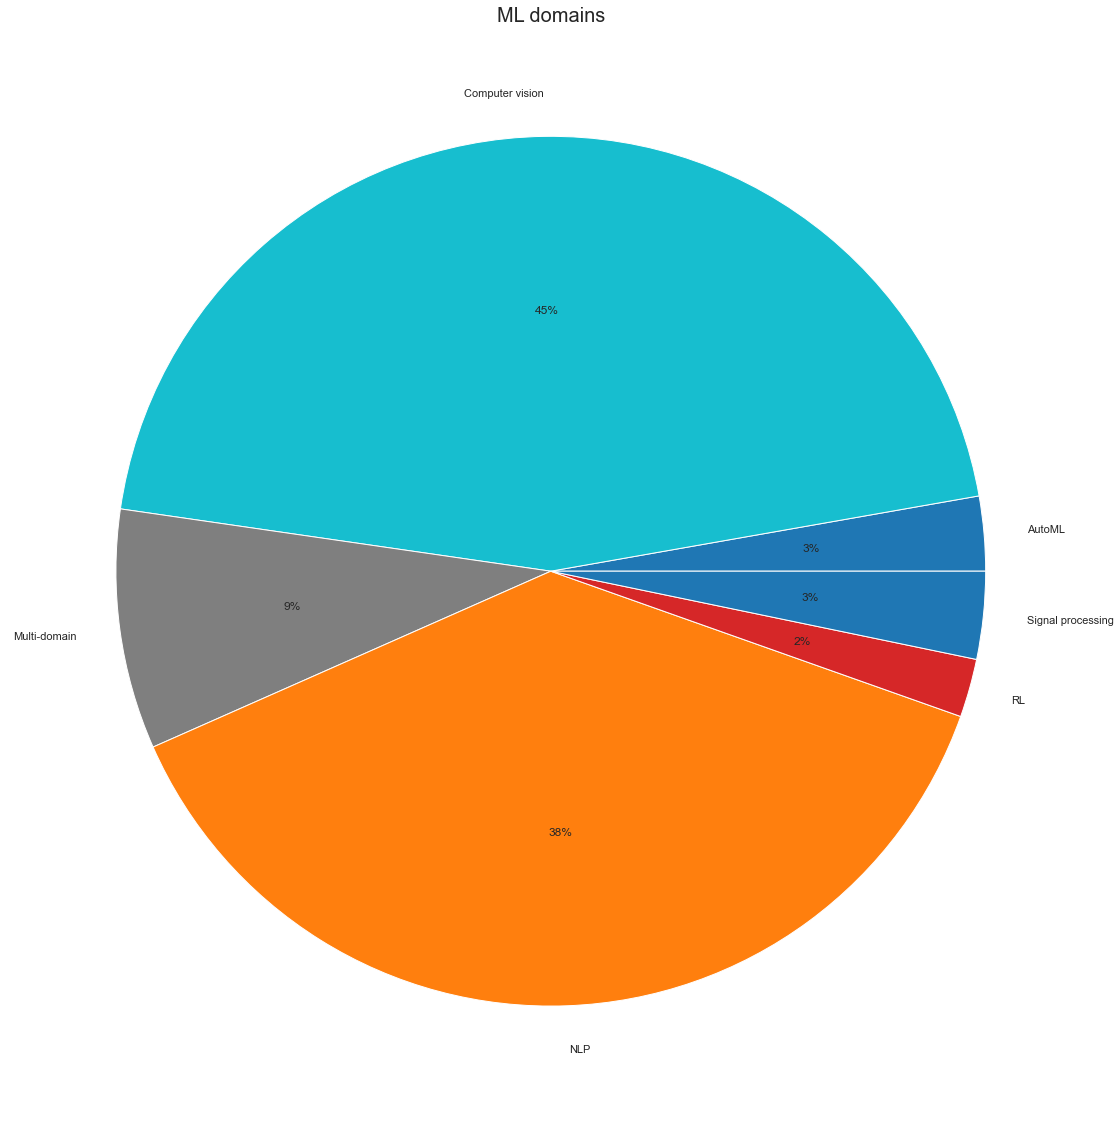

In [209]:
x = df_domains['title']
labels = df_domains.index
colors = ['tab:blue', 'tab:cyan', 'tab:gray', 'tab:orange', 'tab:red']

fig, ax = plt.subplots()
ax.pie(x, labels = labels, colors = colors, autopct='%.0f%%')
ax.set_title('ML domains')
plt.show()

# Correlation matrix

In [188]:
db.corr()

,participants,submissions,year,phases,reward_USD,duration_day,u_mean,u_median,multi-score,multi-task,results submission,code submission,submission_per_participant,log_reward,log_submissions,log_participants
participants,1.000000,0.582588,-0.129906,0.027610,0.117834,-0.051457,-0.027328,-0.028452,0.086962,0.014147,0.013663,-0.060564,0.015932,0.047469,0.465342,0.657907
submissions,0.582588,1.000000,-0.073274,0.054448,0.050468,-0.031634,-0.003769,-0.008648,0.063146,0.019206,0.004500,-0.050711,0.460151,0.006734,0.575983,0.449956
year,-0.129906,-0.073274,1.000000,0.040583,-0.032222,-0.020295,0.038636,0.041071,0.095810,-0.079956,-0.020442,0.086331,0.073312,-0.059795,0.031413,-0.091879
phases,0.027610,0.054448,0.040583,1.000000,0.003991,-0.059274,0.034300,0.042463,0.009564,0.182415,0.000528,-0.032391,0.147256,-0.023873,0.193291,0.085056
reward_USD,0.117834,0.050468,-0.032222,0.003991,1.000000,-0.038487,0.086335,0.114530,-0.084294,0.010797,-0.208499,0.150239,-0.020927,0.747199,0.142146,0.197196
duration_day,-0.051457,-0.031634,-0.020295,-0.059274,-0.038487,1.000000,-0.017550,-0.024781,0.003158,0.031686,0.015094,-0.000841,-0.015978,-0.052393,-0.067246,-0.118596
u_mean,-0.027328,-0.003769,0.038636,0.034300,0.086335,-0.017550,1.000000,0.925691,-0.053028,-0.051950,NaN,0.121414,0.035478,0.188671,0.071175,0.013040
u_median,-0.028452,-0.008648,0.041071,0.042463,0.114530,-0.024781,0.925691,1.000000,-0.069887,-0.059767,NaN,0.151603,0.014398,0.209280,0.042289,-0.006510
multi-score,0.086962,0.063146,0.095810,0.009564,-0.084294,0.003158,-0.053028,-0.069887,1.000000,0.132118,0.017004,-0.076494,0.009202,-0.135078,0.017021,0.063857
multi-task,0.014147,0.019206,-0.079956,0.182415,0.010797,0.031686,-0.051950,-0.059767,0.132118,1.000000,-0.045193,-0.011711,0.014075,-0.007848,0.033167,0.011920


<AxesSubplot:>

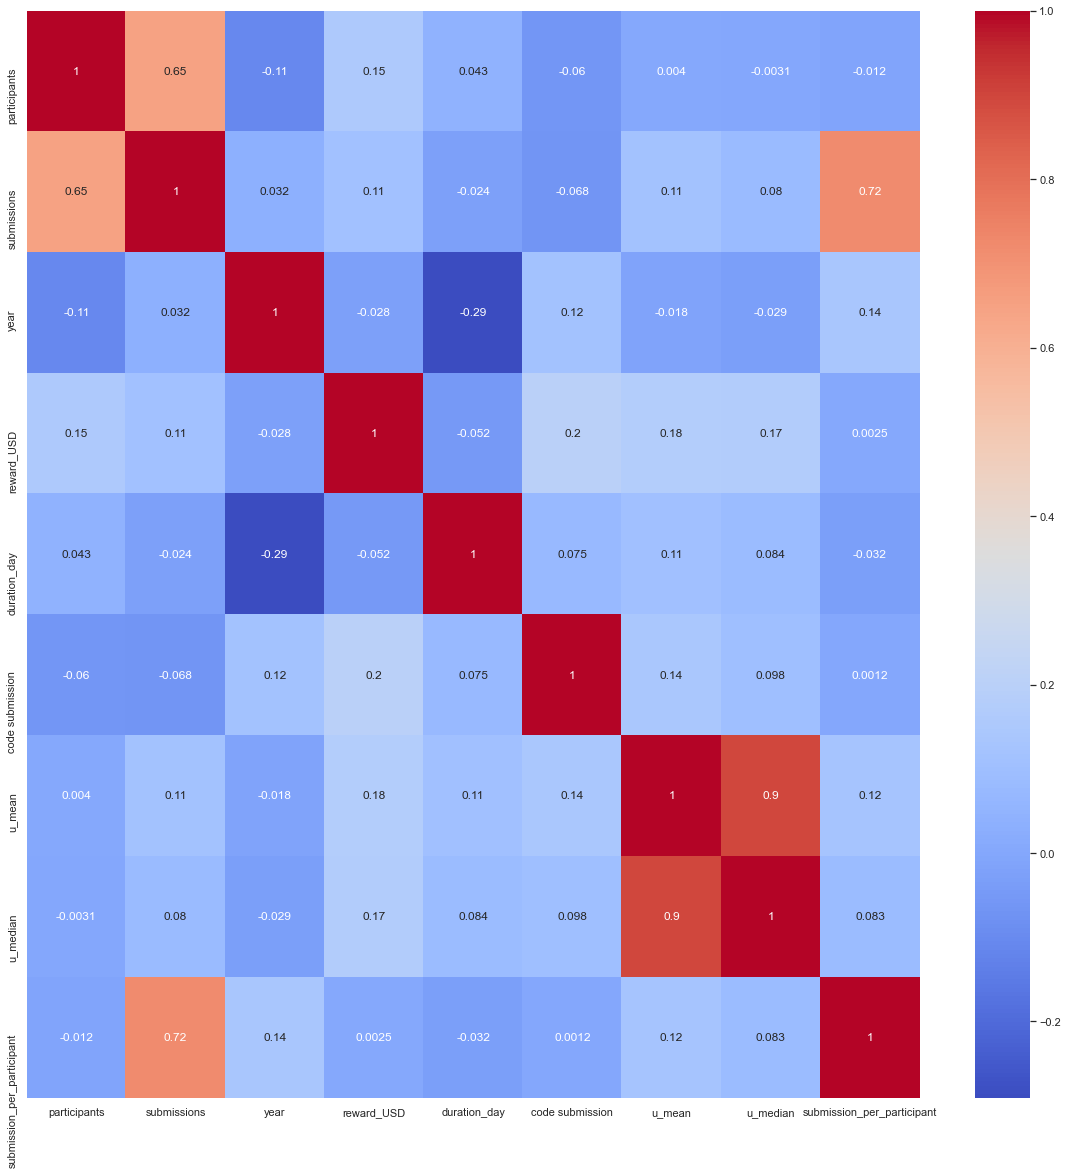

In [210]:
sns.heatmap(db[['participants', 'submissions', 'year','reward_USD', 'duration_day','code submission',\
                'u_mean','u_median', 'submission_per_participant']].corr(method='spearman'), annot = True, cmap = 'coolwarm')

<AxesSubplot:>

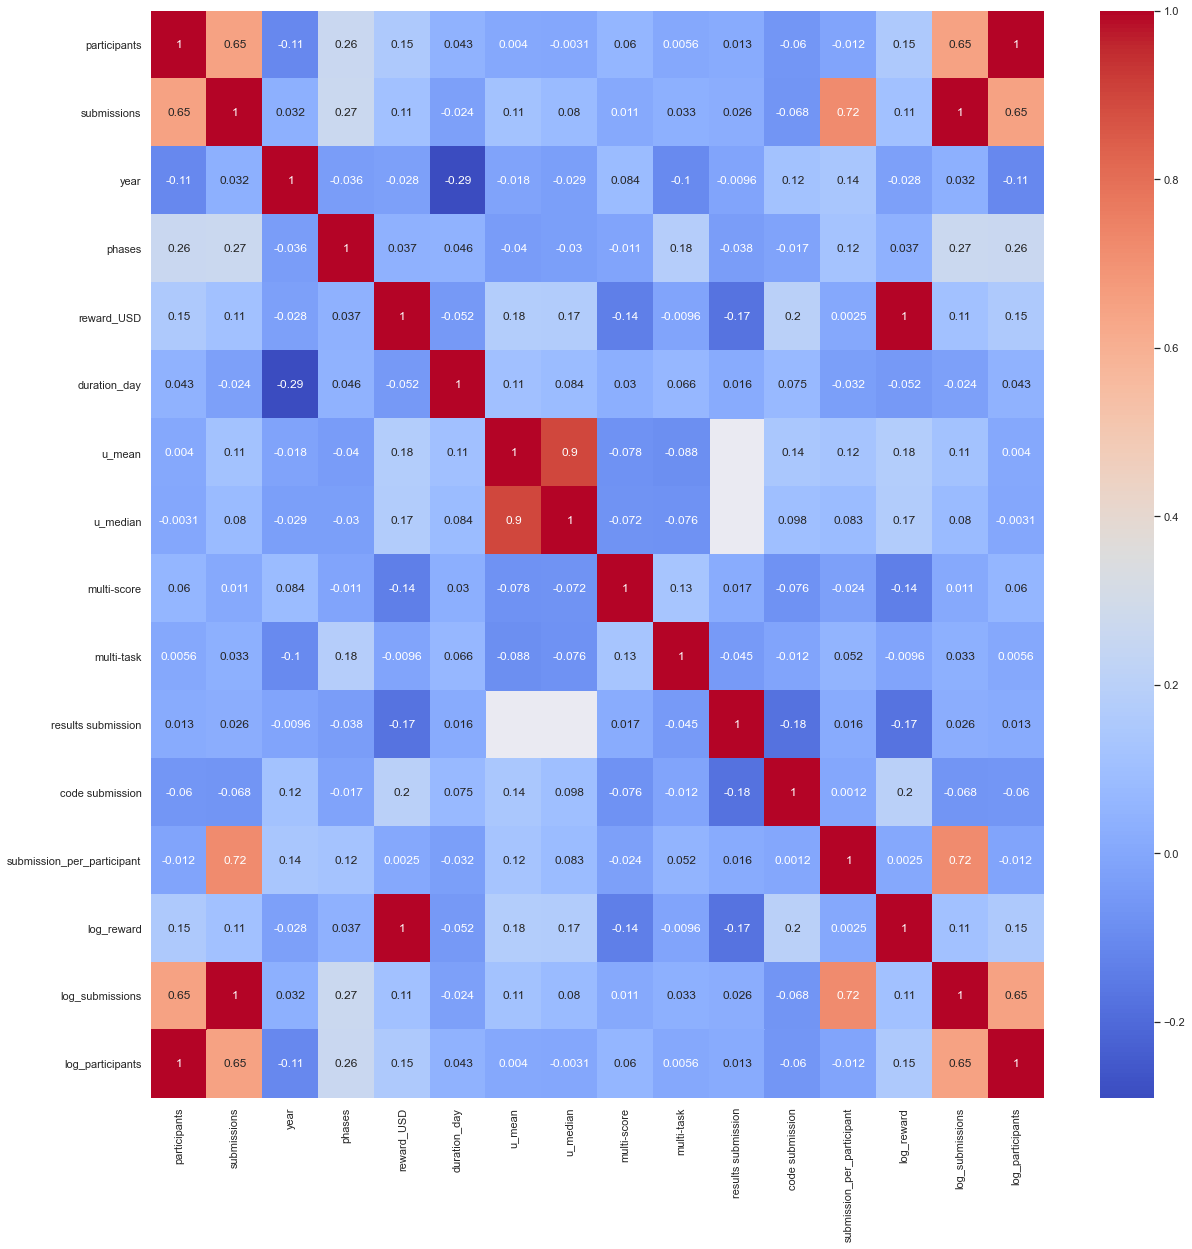

In [211]:
sns.heatmap(db.corr(method='spearman'), annot = True, cmap = 'coolwarm')

# Pairplots

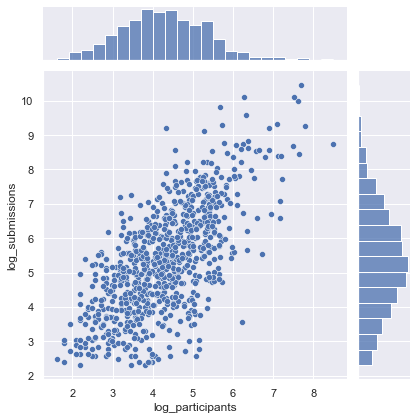

In [191]:
sns.jointplot(x = 'log_participants', y = 'log_submissions', data = db)

In [192]:
#sns.pairplot(db[['participants', 'submissions', 'year', 'reward_USD', 'duration_day', 'results submission','code submission']])#, hue = 'smoker')

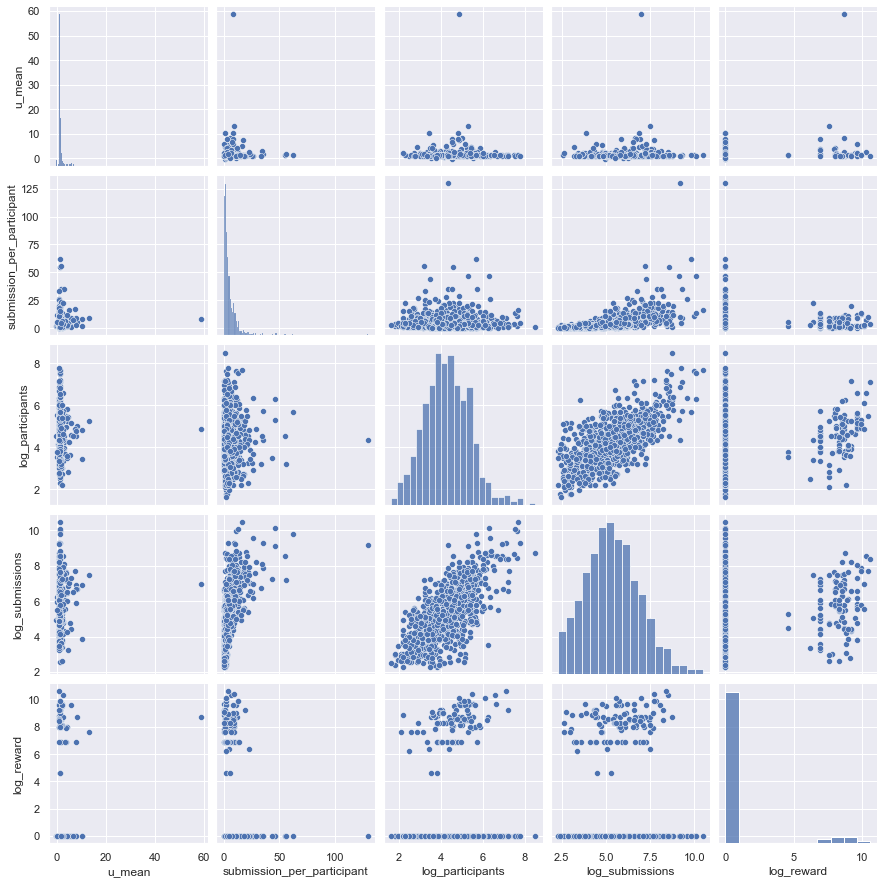

In [193]:
sns.pairplot(db[['u_mean', \
                 #'u_median', \
                 'submission_per_participant', \
                 'log_participants', \
                 'log_submissions', \
                 #'year', \
                 'log_reward']])#, hue = 'code submission')

## Feature importances with a forest of trees

https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html

In [194]:
db.head()

,title,description,participants,submissions,year,phases,reward,reward_USD,duration_day,challenge,website,papers,winner's code,dataset,field of application,ML domain,real task,ML task,u_mean,u_median,dataset size,dataset details,score,metrics,multi-score,multi-task,results submission,code submission,remark,submission_per_participant,log_reward,log_submissions,log_participants
0,The Third Evaluation Workshop on Chinese Machi...,It is the sentence cloze-style machine reading...,46,248.0,2019,3,6500 USD,6500,87.0,https://competitions.codalab.org/competitions/...,https://hfl-rc.com/cmrc2019/; https://ymcui.co...,https://arxiv.org/pdf/2004.03116.pdf,None,https://github.com/ymcui/cmrc2019,"linguistic, philology, litterature",NLP,sentence cloze-style machine reading comprehen...,machine reading comprehension,1.176030,1.192569,10000,NaN,QAC,"Question Accuracy (QAC),Passage Accuracy (PAC)...",1.0,0.0,1.0,0.0,https://github.com/ymcui/cmrc2019/tree/master/...,5.391304,8.779711,5.513429,3.828641
1,Pose-guided Human Rendering Benchmark Challenge,HUMBI is an ideal dataset to evaluate the abil...,12,65.0,2013,1,0,0,NaN,https://competitions.codalab.org/competitions/...,https://www.humbi-data.net/,https://arxiv.org/pdf/2110.00119.pdf; https://...,None,https://competitions.codalab.org/competitions/...,NaN,Computer vision,posture generation,image generation,1.192141,1.099530,374352,"366300 train images, 7674 validation images, 3...",Mrmse,"RMSE, MRMSE, SSIM, MSSIM, ranking is based on ...",0.0,0.0,1.0,0.0,https://github.com/Gorokke/humanrender_class,5.416667,0.000000,4.174387,2.484907
2,MICCAI Multimodal Brain Tumor Segmentation (BR...,The BRaTS challenge is designed to gauge the c...,141,50.0,2013,2,0,0,22.0,https://competitions.codalab.org/competitions/1,http://braintumorsegmentation.org/,https://hal.inria.fr/hal-00912934/document; ht...,None,NaN,medicine,Computer vision,image recognition,image recognition,NaN,NaN,NaN,772 distinctive subjects,Overall Rank,"Dice score, Hausdorff distance, Sensitivity, S...",1.0,0.0,1.0,0.0,NaN,0.354610,0.000000,3.912023,4.948760
3,ChaLearn LAP 2014 - Track 1: Human Pose Recovery,"More than 8,000 frames of continuous RGB seque...",100,25.0,2014,2,1000 USD,1000,108.0,https://competitions.codalab.org/competitions/971,https://gesture.chalearn.org/2014-looking-at-p...,https://www.researchgate.net/publication/28984...,None,http://sunai.uoc.edu/chalearnLAP/,NaN,Computer vision,human pose recovery from RGB data,image recognition,NaN,NaN,8234,"4,000 dev labelled frames, 2,000 validation la...",Overlap,Jaccard Index (overlapping),0.0,0.0,1.0,1.0,NaN,0.250000,6.908755,3.218876,4.605170
4,ChaLearn LAP 2014 - Track 2: Action Recognition,Recognizing actions/interactions using 235 per...,108,36.0,2014,2,1000 USD,1000,108.0,https://competitions.codalab.org/competitions/981,NaN,NaN,None,http://sunai.uoc.edu/chalearnLAP/,NaN,Computer vision,action and interaction recognition from RGB da...,image recognition,NaN,NaN,NaN,235 action samples performed by 17 actors,Overlap,Jaccard Index (overlapping),0.0,0.0,1.0,1.0,NaN,0.333333,6.908755,3.583519,4.682131


In [195]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
import time

In [196]:
db_features=db.dropna(subset=['u_mean'])

In [197]:
db_features.describe()

,participants,submissions,year,phases,reward_USD,duration_day,u_mean,u_median,multi-score,multi-task,results submission,code submission,submission_per_participant,log_reward,log_submissions,log_participants
count,396.000000,396.000000,396.000000,396.000000,396.000000,353.000000,396.000000,396.000000,386.000000,386.000000,396.0,396.000000,396.000000,396.000000,396.000000,396.000000
mean,173.631313,1076.101010,2019.484848,2.469697,1021.742424,891.490085,1.806483,1.748305,0.450777,0.150259,1.0,0.133838,6.061732,1.089264,5.895774,4.601176
std,280.540149,2867.778374,1.669464,1.874976,3857.541979,4029.828767,3.177237,3.492317,0.498217,0.357789,0.0,0.340909,7.188841,2.869277,1.366698,0.972464
min,9.000000,13.000000,2013.000000,1.000000,0.000000,2.000000,-0.098874,0.000000,0.000000,0.000000,1.0,0.000000,0.226950,0.000000,2.564949,2.197225
25%,48.000000,136.500000,2019.000000,2.000000,0.000000,56.000000,1.124924,1.069264,0.000000,0.000000,1.0,0.000000,1.754012,0.000000,4.916304,3.871201
50%,92.000000,311.500000,2020.000000,2.000000,0.000000,82.000000,1.247549,1.159219,0.000000,0.000000,1.0,0.000000,3.833198,0.000000,5.741336,4.521789
75%,193.250000,836.250000,2021.000000,3.000000,0.000000,148.000000,1.569930,1.448468,1.000000,0.000000,1.0,0.000000,8.277947,0.000000,6.728927,5.263982
max,2401.000000,35260.000000,2022.000000,14.000000,40000.000000,29384.000000,58.741467,61.912309,1.000000,1.000000,1.0,1.000000,62.154110,10.596660,10.470504,7.783641


In [198]:
y=db_features['u_mean']
X=db_features[['participants','submissions','year','phases','reward_USD','duration_day','multi-score',\
      'multi-task','results submission','code submission','submission_per_participant']]

In [199]:
np.sum(pd.isna(y))

0

In [200]:
print(X.shape)
print(y)

(396, 11)
0      1.176030
1      1.192141
5      1.360556
7     -0.098874
8      2.687500
         ...   
659    1.033074
660    1.227548
661    1.255442
665    0.000000
666    1.703778
Name: u_mean, Length: 396, dtype: float64


In [201]:
X.fillna(X.mean(),inplace=True)

C:\Users\do-u-\anaconda3\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [202]:
np.sum(np.isnan(X))

participants                  0
submissions                   0
year                          0
phases                        0
reward_USD                    0
duration_day                  0
multi-score                   0
multi-task                    0
results submission            0
code submission               0
submission_per_participant    0
dtype: int64

In [203]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42)
feature_names = [f"feature {i}" for i in range(X.shape[1])]
feature_names = list(X_train.columns)
#forest = RandomForestClassifier(random_state=0)
forest = RandomForestRegressor(random_state=0)

forest.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [204]:
start_time = time.time()
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.018 seconds


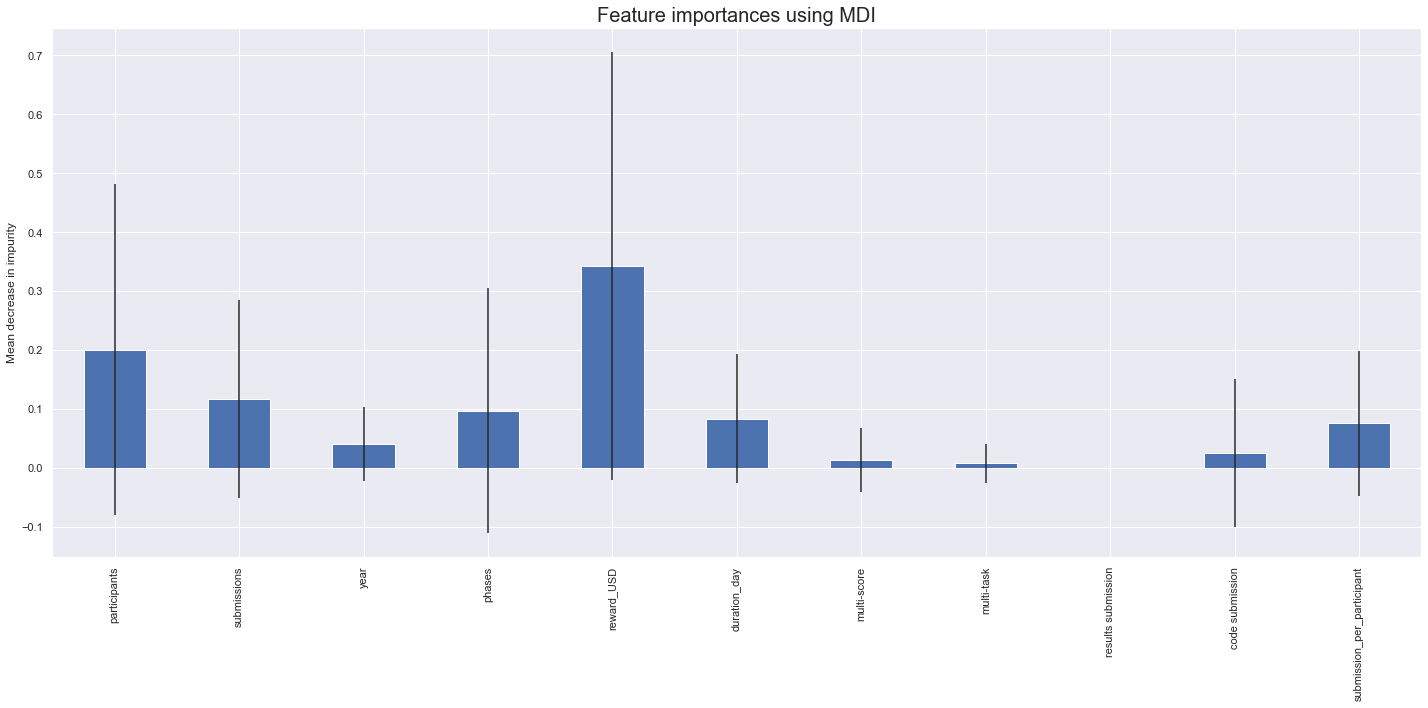

In [208]:
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")

fig.tight_layout()
plt.rcParams["figure.figsize"] = (20,20)

## Feature importance based on feature permutation

In [206]:
from sklearn.inspection import permutation_importance

start_time = time.time()
result = permutation_importance(
    forest, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=feature_names)

Elapsed time to compute the importances: 0.828 seconds


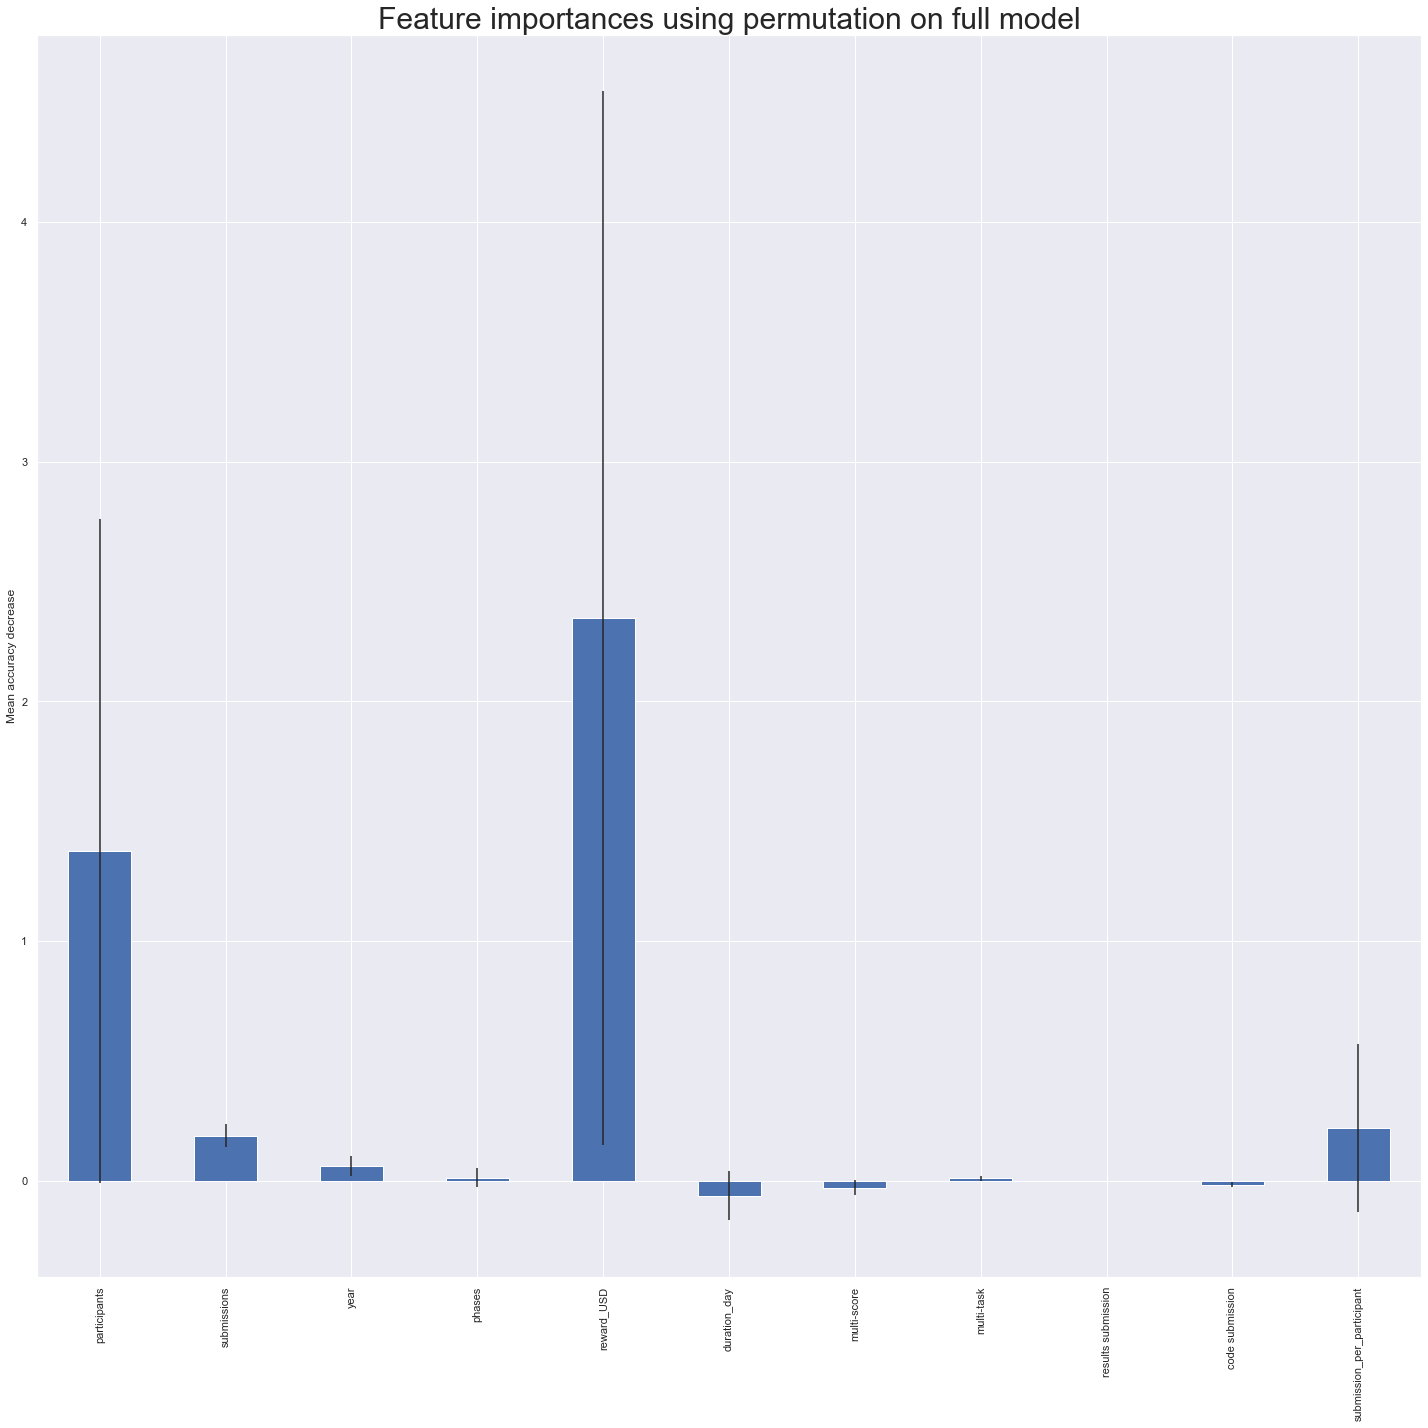

In [207]:
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model", fontsize=30)
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()
plt.rcParams["figure.figsize"] = (20,10)